## TAKE HOME EXERCISE 

#### Hint: Use the following piece of code and try t test for one sample

In [1]:
import numpy       as np
import scipy.stats as stats
volume = np.array([2.109, 2.086, 2.066, 2.075, 2.065, 2.057, 2.052, 2.044, 2.036, 2.038, \
                   2.031, 2.029, 2.025, 2.029, 2.023, 2.020, 2.015, 2.014, 2.013, 2.014,\
                   2.012, 2.012, 2.012, 2.010, 2.005, 2.003, 1.999, 1.996, 1.997, 1.992,\
                   1.994, 1.986, 1.984, 1.981, 1.973, 1.975, 1.971, 1.969, 1.966, 1.967,\
                   1.963, 1.957, 1.951, 1.951, 1.947, 1.941, 1.941, 1.938, 1.908, 1.894])

print('Mean is %3.2f and standard deviation is %3.2f' %(volume.mean(),np.std(volume,ddof = 1)))

Mean is 2.00 and standard deviation is 0.04


Hypothesis

Ho :- Mean of soft drink filled is 2 litres.
Ha :- Mean of soft drink filled is not equal to 2 litres.

In [2]:
stats.ttest_1samp(volume,2)

# By default, ttest_1samp returns p_value for 2 tail test, if we want p_value for one tail test, we divide the 2 test p_value by
# 2

Ttest_1sampResult(statistic=0.11424484790269986, pvalue=0.9095105442498921)

The probability value is greter than 0.05. We are 95% confident that the mean value of the soft drink is 2 litres.

This can also be solved using anogther technique, manually finding the ztest value and then the p_value as follows

In [3]:
mu = 2
n = 50
x_bar = volume.mean()
sigma = np.std(volume, ddof=1)
z = (x_bar - mu)/(sigma / (np.sqrt(n)))
print('Test statistics is',z)

Test statistics is 0.11424484790269987


In [5]:
import scipy.stats as stats
print('p_value for the critical point is',stats.norm.sf(z)*2)
#stats.norm.isf(0.025)

p_value for the critical point is 0.9090437011301336


The probability value is greter than 0.05. We are 95% confident that the mean value of the soft drink is 2 litres.

**2. Sugar consumption in grams of 20 patients (both diabetic and non-diabetic) are given below:**

*At 5% level of significance, is there evidence that the mean sugar consumption is different for diabetic and non-diabetic?**    In the following table, 0 means diabetic and 1 means non-diabetic.*
    

In [6]:
import numpy       as np
import scipy.stats as stats
weight               = np.array([[9.31, 0],[7.76, 0],[6.98, 1],[7.88, 1],[8.49, 1],[10.05, 1],[8.80, 1],[10.88, 1],[6.13, 1],[7.90, 1], \
                            [11.51, 0],[12.59, 0],[7.05, 1],[11.85, 0],[9.99, 0],[7.48, 0],[8.79, 0],[8.69, 1],[9.68, 0],[8.58, 1],\
                           [9.19, 0],[8.11, 1]])

sugar_diabetic       = weight[:,1] == 0
sugar_diabetic       = weight[sugar_diabetic][:,0]
sugar_nondiabetic    = weight[:,1] == 1
sugar_nondiabetic    = weight[sugar_nondiabetic][:,0] 

In [7]:
sugar_diabetic, sugar_nondiabetic

(array([ 9.31,  7.76, 11.51, 12.59, 11.85,  9.99,  7.48,  8.79,  9.68,
         9.19]),
 array([ 6.98,  7.88,  8.49, 10.05,  8.8 , 10.88,  6.13,  7.9 ,  7.05,
         8.69,  8.58,  8.11]))

Hypothesis statement

Ho :- The mean of sugar consumption of diabetic is equal to the mean of sugar consumption of non_diabetic.
Ha :- The mean of sugar consumption of diabetic is not equal to the mean of sugar consumption of non_diabetic.

In [8]:
# we first perform shapiro test to check for the normality of the data.

print(stats.shapiro(sugar_diabetic))
print(stats.shapiro(sugar_nondiabetic))

(0.946360170841217, 0.6256824731826782)
(0.9630682468414307, 0.826569676399231)


It is evident from the shapiro test that both the data are normal, hence we go for parametric independent(paired) test, ttest_ind...

In [9]:
tstat, p_val = stats.ttest_ind(sugar_diabetic, sugar_nondiabetic)
print('Test_statistics is %.7f and p_value is %.7f' %(tstat, p_val))

Test_statistics is 2.3730593 and p_value is 0.0277774


It is observed that the value of p_value is less than 0.05, hence we reject the NULL hypothesis. 

We can conclude that, the mean of sugar consumption of diabetic is not equal to the mean of sugar consumption of non_diabetic.

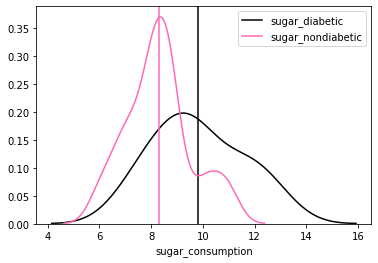

In [11]:
# Post-Hoc analysis

import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(sugar_diabetic, color='black', label='sugar_diabetic')
plt.axvline(np.mean(sugar_diabetic), color='black')
sns.kdeplot(sugar_nondiabetic, color='hotpink', label='sugar_nondiabetic')
plt.axvline(np.mean(sugar_nondiabetic), color='hotpink')
plt.xlabel('sugar_consumption')
plt.legend()
plt.show()

It is inferred form the graph that the mean sugar_consumption of non_diabets are very less compared to the mean sugar_comsumption of diabets.

**3 The delivery time of Pizza from an online food deliery service firm and the home delivery from a local restaurant are given below: At 5% level of significance, is the mean delivery time for online delivery food service firm is less than the mean delivery time for the home delivery from a local restaurant.**

In [12]:
Pizza_delivery_online = [16.8, 11.7, 15.6, 16.7, 17.5, 18.1, 14.1, 21.8, 13.9, 20.8]
Pizza_delivery_local  = [22.0, 15.2, 18.7, 15.6, 20.8, 19.5, 17.0, 19.5, 16.5, 24.0]

#### Hint: Use paired t test

Hypothesis:
    
Ho :- The mean delivery time of online_delivery is greater than or equal to the mean delivery time of local_delivery.
Ha :- The mean delivery time of online_delivery is less than the mean delivery time of local_delivery.

In [13]:
# Test of normality.

print(stats.shapiro(Pizza_delivery_online))
print(stats.shapiro(Pizza_delivery_local))

(0.9727442264556885, 0.9150571227073669)
(0.9577153325080872, 0.7595410943031311)


It is observed that both the data are normal, hence we go for paramteric dependent t test, ttest_1samp()...

In [14]:
stats.ttest_1samp(np.array(Pizza_delivery_online) - np.array(Pizza_delivery_local), 0)

Ttest_1sampResult(statistic=-3.0447930464454114, pvalue=0.013909593560837055)

In [15]:
# we cam also solve that using ttest_rel

stats.ttest_rel(Pizza_delivery_online,Pizza_delivery_local)

Ttest_relResult(statistic=-3.0447930464454114, pvalue=0.013909593560837055)

In [16]:
# Observation

# pvalue is less than 0.05, null hypothesis is rejected.

# There exists a significant difference between the mean delivery time for online delivery food service firm is less than the mean delivery time for the home delivery from a local restaurant.

## End